# Data analysis on the Indian start-up ecosysytem

## Business Understanding
**Objective:** The primary objective is to venture into the Indian start-up ecosystem. This involves understanding the landscape of start-ups in India, their funding patterns, and the key players in the ecosystem (both start-ups and investors).

**Problem Definition:** The problem can be defined as analyzing the funding received by Indian start-ups from 2018 to 2021. This involves understanding the trends in funding, identifying the sectors or industries that are attracting the most investment, and recognizing the major investors in the ecosystem.

**Data Understanding:** The data that will be used for this analysis includes details of the start-ups, the funding amounts they received, and information about the investors. This data will be provided separately for each year from 2018 to 2021 via three different sources.

**Plan:** The preliminary plan would involve cleaning and preprocessing the data, conducting exploratory data analysis to understand trends and patterns, and possibly building predictive models to forecast future trends in the start-up ecosystem.

**Success Criteria:** The success of this project could be measured by the team’s ability to gain insights that help in making informed decisions about venturing into the Indian start-up ecosystem. This could involve identifying promising sectors, understanding the competitive landscape, and recognizing potential investment opportunities.

### Hypothesis Test

*Null Hypothesis (H0):* The location of a start-up in India does not affect the amount of funding it receives.

*Alternative Hypothesis (H1):* The location of a start-up in India does affect the amount of funding it receives.

*Null Hypothesis (H0):* There is no difference in the amount of funding received by start-ups across different sectors.

*Alternative Hypothesis (H1):* There is a difference in the amount of funding received by start-ups across different sectors.

*Null Hypothesis (H0):* The size of a start-up (in terms of employees or customers) does not affect the amount of funding it receives.

*Alternative Hypothesis (H1):* The size of a start-up (in terms of employees or customers) does affect the amount of funding it receives.

*Null Hypothesis (H0):* All investors contribute equally to the funding of start-ups.

*Alternative Hypothesis (H1):* Some investors contribute more to the funding of start-ups than others.

*Null Hypothesis (H0):* The amount of funding received by Indian start-ups has not changed from 2018 to 2021.

*Alternative Hypothesis (H1):* The amount of funding received by Indian start-ups has increased or decreased from 2018 to 2021.

### Relevant Questions

1 - How has the funding trend for Indian start-ups changed from 2018 to 2021? Are there any noticeable patterns or trends?

2 - Which sectors or industries received the most funding? Are there any sectors that are emerging as new favorites for investors?

3 - Who are the major investors in the Indian start-up ecosystem? Are there any investors who are particularly active or influential?

4 - Are there any specific cities or regions in India that are attracting more start-ups or funding?

5 - Is there a correlation between the size of the start-up (in terms of employees or customers) and the amount of funding received?

6 - Which start-ups have shown the most growth in terms of funding received over the years?

7 - Is there a correlation between the amount of funding received and the success of the start-up?

8 - Can we identify common investment strategies among the major investors?

## Data Understanding


### Setup:

### Importation
Here is the section to import all the packages/libraries that will be used through the notebook

In [1]:
# Import all the necessary packages

import pyodbc     
from dotenv import dotenv_values   
import pandas as pd
import matplotlib as plt 
import os
import warnings 

warnings.filterwarnings('ignore')

### Data Loading
Here is the section to load the dataset

In [2]:
# Load from GitHub repository source

# URL of the raw csv file in the GitHub repository
url = 'https://raw.githubusercontent.com/Azubi-Africa/Career_Accelerator_LP1-Data_Analysis/main/startup_funding2018.csv'

# Use pandas to load the csv file
data_2018 = pd.read_csv(url)

In [3]:
# Display head
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [4]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [5]:
data_2018.shape

(526, 6)

In [6]:
# Load from OneDrive source

# Use pandas to load the csv file
data_2019 = pd.read_csv('C:/Users/USER/Desktop/LP1/startup_funding2019.csv')

# Display head
data_2019.head() 

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [7]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [8]:
data_2019.shape

(89, 9)

In [9]:
# Load from SQL Database source

# Load environment variables from .env file into a dictionary
environment_variables  = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

In [10]:
# Create a connection string

connection_string = f"Driver={{SQL Server}}; SERVER={server}; DATABASE={database}; UID={username}; PWD={password}"

In [11]:
# Use the connect method of the pyodbc library and pass in the connection string.

connection = pyodbc.connect(connection_string)

In [12]:
# SQL query to extract the data from Table1 
query_2020 = "SELECT * from dbo.LP1_startup_funding2020"
 
 # Execute the SQL query to load data from Table1 into pandas Dataframe
data_2020= pd.read_sql(query_2020, connection)

 # SQL query to extract the data from Table2
query_2021 = "SELECT * from dbo.LP1_startup_funding2021"

 # Execute the SQL query to load data from Table2 into pandas Dataframe
data_2021 = pd.read_sql(query_2021, connection)

In [13]:
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [14]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [15]:
data_2020.shape

(1055, 10)

In [16]:
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [17]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [18]:
data_2021.shape

(1209, 9)

In [19]:
# We are renaming the columns in the dataframe 'data_2018'
data_2018.rename(
    columns={
        'Company Name': 'Company_Brand',  # Changing 'Company Name' to 'Company_Brand'
        'Industry': 'Sector',  # Changing 'Industry' to 'Sector'
        'Round/Series': 'Stage',  # Changing 'Round/Series' to 'Stage'
        'Amount': 'Amount($)',  # Changing 'Amount' to 'Amount($)'
        'Location': 'HeadQuarter',  # Changing 'Location' to 'HeadQuarter'
        'About Company': 'What_it_does'  # Changing 'About Company' to 'What_it_does'
        # Add more column changes as needed
    },
    inplace=True  # This will modify 'dat_3' directly
)

In [20]:
# We are renaming the columns in the dataframe 'data_2019'
data_2019.rename(
    columns={
        'Company/Brand': 'Company_Brand',  # Changing 'Company Name' to 'Company_Brand'
        'What it does': 'What_it_does'  # Changing 'About Company' to 'What_it_does'
        # Add more column changes as needed
    },
    inplace=True  # This will modify 'dat_3' directly
)

In [21]:
# We are renaming the columns in the dataframe 'data_2020'
data_2020.rename(
    columns={
        'Amount': 'Amount($)',  # Changing 'Amount' to 'Amount($)'
    },
    inplace=True  # This will modify 'dat_3' directly
)


In [22]:
# We are renaming the columns in the dataframe 'data_2021'
data_2021.rename(
    columns={
        'Amount': 'Amount($)',  # Changing 'Amount' to 'Amount($)'
    },
    inplace=True  # This will modify 'dat_3' directly
)

In [23]:
data_2018.head()



,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [24]:
data_2019.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [25]:

data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [26]:
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [27]:
# Concatenate data into a single Dataframe

concatenated_data = pd.concat([data_2018, data_2019, data_2020, data_2021], ignore_index=True)

In [28]:
concatenated_data.to_csv("Indian_start-ups.csv")

In [29]:
df = pd.read_csv("Indian_start-ups.csv")

In [30]:
df.head()

,Unnamed: 0,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Founded,Founders,Investor,column10
0,0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN,NaN
1,1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,NaN,NaN
2,2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,NaN,NaN
3,3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN,NaN
4,4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2879 non-null   int64  
 1   Company_Brand  2879 non-null   object 
 2   Sector         2861 non-null   object 
 3   Stage          1941 non-null   object 
 4   Amount($)      2622 non-null   object 
 5   HeadQuarter    2765 non-null   object 
 6   What_it_does   2879 non-null   object 
 7   Founded        2110 non-null   float64
 8   Founders       2334 non-null   object 
 9   Investor       2253 non-null   object 
 10  column10       2 non-null      object 
dtypes: float64(1), int64(1), object(9)
memory usage: 247.5+ KB


In [32]:
df.shape

(2879, 11)

In [33]:
df.isnull().sum()

Unnamed: 0          0
Company_Brand       0
Sector             18
Stage             938
Amount($)         257
HeadQuarter       114
What_it_does        0
Founded           769
Founders          545
Investor          626
column10         2877
dtype: int64

In [34]:
# Drop columns: 'Company Name', 'column10' and 4 other columns
df = df.drop(columns=['column10'])

In [35]:
df.head()

,Unnamed: 0,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Founded,Founders,Investor
0,0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN
1,1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,NaN
2,2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,NaN,NaN,NaN
3,3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,NaN,NaN,NaN
4,4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,NaN,NaN,NaN


In [36]:
df = df.convert_dtypes()


In [37]:
df

,Unnamed: 0,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Founded,Founders,Investor
0,0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",<NA>,<NA>,<NA>
1,1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,<NA>,<NA>,<NA>
2,2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,<NA>,<NA>,<NA>
3,3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,<NA>,<NA>,<NA>
4,4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...
2874,2874,Gigforce,Staffing & Recruiting,Pre-series A,$3000000,Gurugram,A gig/on-demand staffing company.,2019,"Chirag Mittal, Anirudh Syal",Endiya Partners
2875,2875,Vahdam,Food & Beverages,Series D,$20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2015,Bala Sarda,IIFL AMC
2876,2876,Leap Finance,Financial Services,Series C,$55000000,Bangalore,International education loans for high potenti...,2019,"Arnav Kumar, Vaibhav Singh",Owl Ventures
2877,2877,CollegeDekho,EdTech,Series B,$26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2015,Ruchir Arora,"Winter Capital, ETS, Man Capital"


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2879 entries, 0 to 2878
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     2879 non-null   Int64 
 1   Company_Brand  2879 non-null   string
 2   Sector         2861 non-null   string
 3   Stage          1941 non-null   string
 4   Amount($)      2879 non-null   object
 5   HeadQuarter    2765 non-null   string
 6   What_it_does   2879 non-null   string
 7   Founded        2110 non-null   Int64 
 8   Founders       2334 non-null   string
 9   Investor       2253 non-null   string
dtypes: Int64(2), object(1), string(7)
memory usage: 230.7+ KB


In [43]:
# df['Amount($)'] = df['Amount($)'].str.replace('$','').apply(lambda x: f"${x}")

In [45]:
df

,Unnamed: 0,Company_Brand,Sector,Stage,Amount($),HeadQuarter,What_it_does,Founded,Founders,Investor
0,0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,$250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",<NA>,<NA>,<NA>
1,1,Happy Cow Dairy,"Agriculture, Farming",Seed,"$₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,<NA>,<NA>,<NA>
2,2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"$₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,<NA>,<NA>,<NA>
3,3,PayMe India,"Financial Services, FinTech",Angel,$2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,<NA>,<NA>,<NA>
4,4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,$—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...
2874,2874,Gigforce,Staffing & Recruiting,Pre-series A,$3000000,Gurugram,A gig/on-demand staffing company.,2019,"Chirag Mittal, Anirudh Syal",Endiya Partners
2875,2875,Vahdam,Food & Beverages,Series D,$20000000,New Delhi,VAHDAM is among the world’s first vertically i...,2015,Bala Sarda,IIFL AMC
2876,2876,Leap Finance,Financial Services,Series C,$55000000,Bangalore,International education loans for high potenti...,2019,"Arnav Kumar, Vaibhav Singh",Owl Ventures
2877,2877,CollegeDekho,EdTech,Series B,$26000000,Gurugram,"Collegedekho.com is Student’s Partner, Friend ...",2015,Ruchir Arora,"Winter Capital, ETS, Man Capital"


In [49]:
df.describe()

,Unnamed: 0,Founded
count,2879.0,2110.0
mean,1439.0,2016.079621
std,831.240038,4.368006
min,0.0,1963.0
25%,719.5,2015.0
50%,1439.0,2017.0
75%,2158.5,2019.0
max,2878.0,2021.0


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2879.0,1439.0,831.240038,0.0,719.5,1439.0,2158.5,2878.0
Founded,2110.0,2016.079621,4.368006,1963.0,2015.0,2017.0,2019.0,2021.0


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'Founded'}>]], dtype=object)

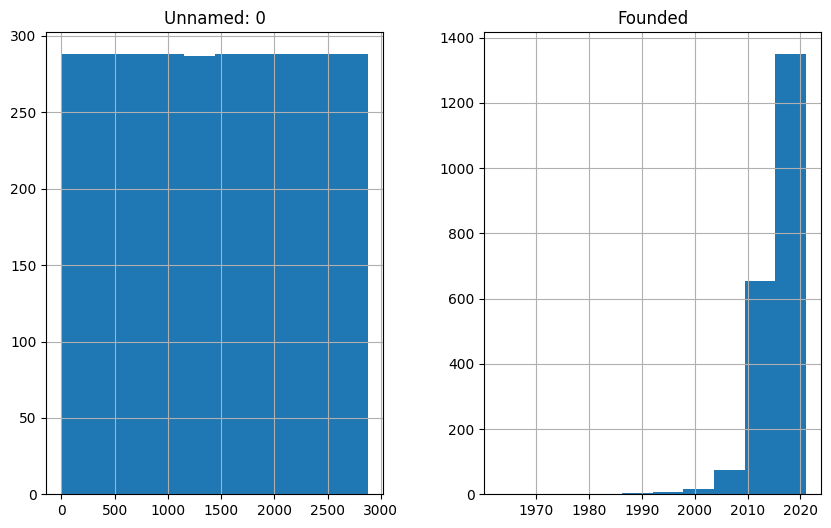

In [53]:
# Universal analysis
# Histogram for numeric variables

df.hist(figsize=(10,6))

